# Visualização e pré-processamento

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
import mne

import warnings


# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

In [2]:
def print_graphs(data):
    num_files, _, _ = data.shape

    num_rows = num_files // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(16, 3 * num_rows))

    for i in range(0, 4):
        for j in range(0, 21, 3):
            row = i // 2
            col = i % 2

            axs[row, col].plot(data[i][j, :])
            axs[row, col].set_title(f'Domínio do tempo - Arquivo {i+1}')

    plt.tight_layout()
    plt.show()

    num_rows = num_files // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(16, 3 * num_rows))

    for i in range(0, 4):
        for j in range(0, 21, 3):
            row = i // 2
            col = i % 2

            axs[row, col].psd(data[i][j, :], Fs=512)
            axs[row, col].set_title(f'Domínio da frquencia - Arquivo {i+1}')

    plt.tight_layout()
    plt.show()

    num_rows = num_files // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(16, 3 * num_rows))

    for i in range(0, 4):
        for j in range(0, 21, 3):
            row = i // 2
            col = i % 2

            axs[row, col].specgram(data[i][j, :], Fs=512)
            axs[row, col].set_title(f'Domínio da frquencia - Arquivo {i+1}')

    plt.tight_layout()
    plt.show()

In [3]:
data_list = []
for i in range(1, 5):
    filename = f"../dataset/single/data_sub{i}.npy"
    data = np.load(filename)
    data_list.append(data)

data = np.stack(data_list, axis=0)

data.shape

(4, 21, 15360)

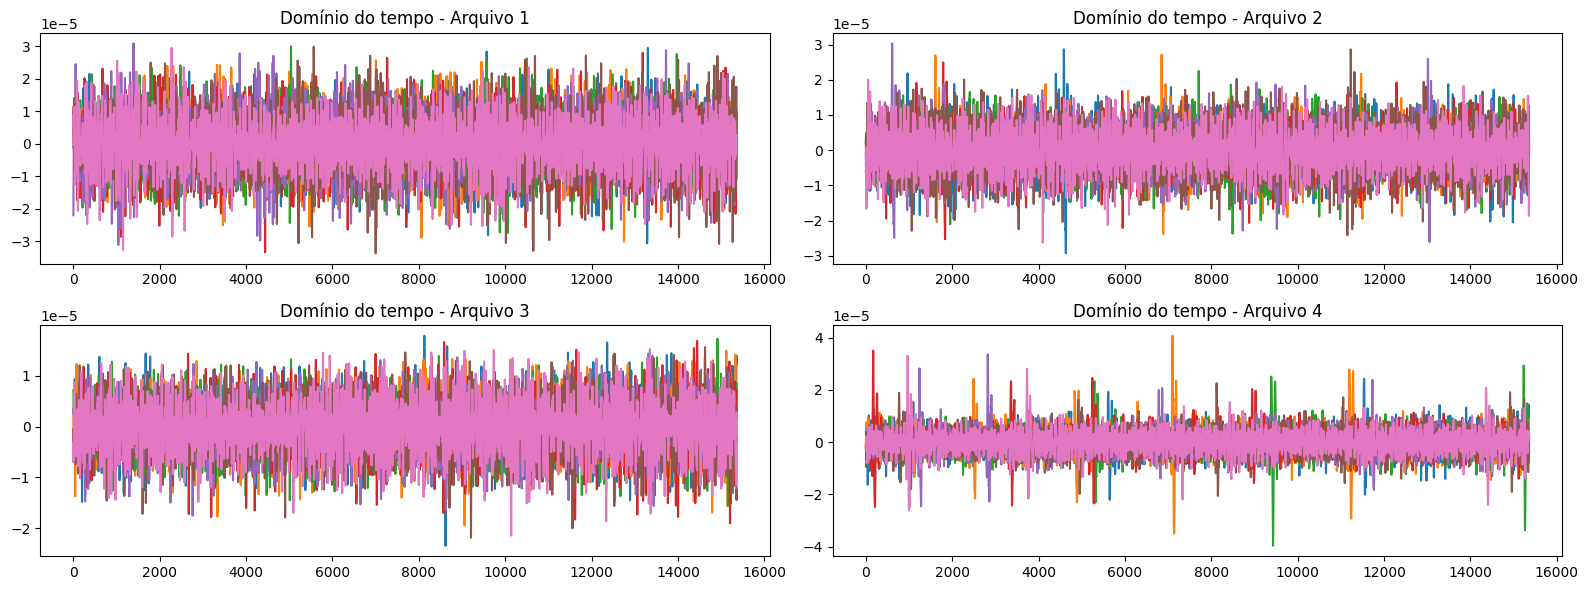

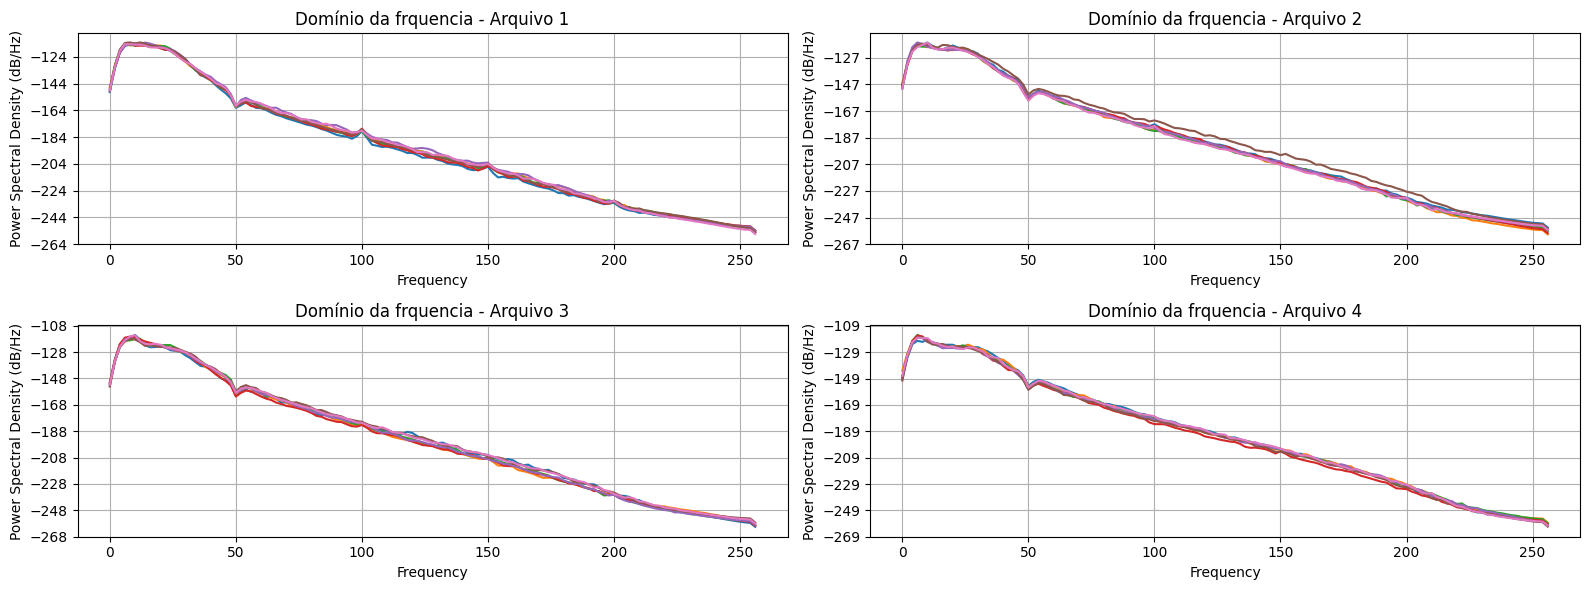

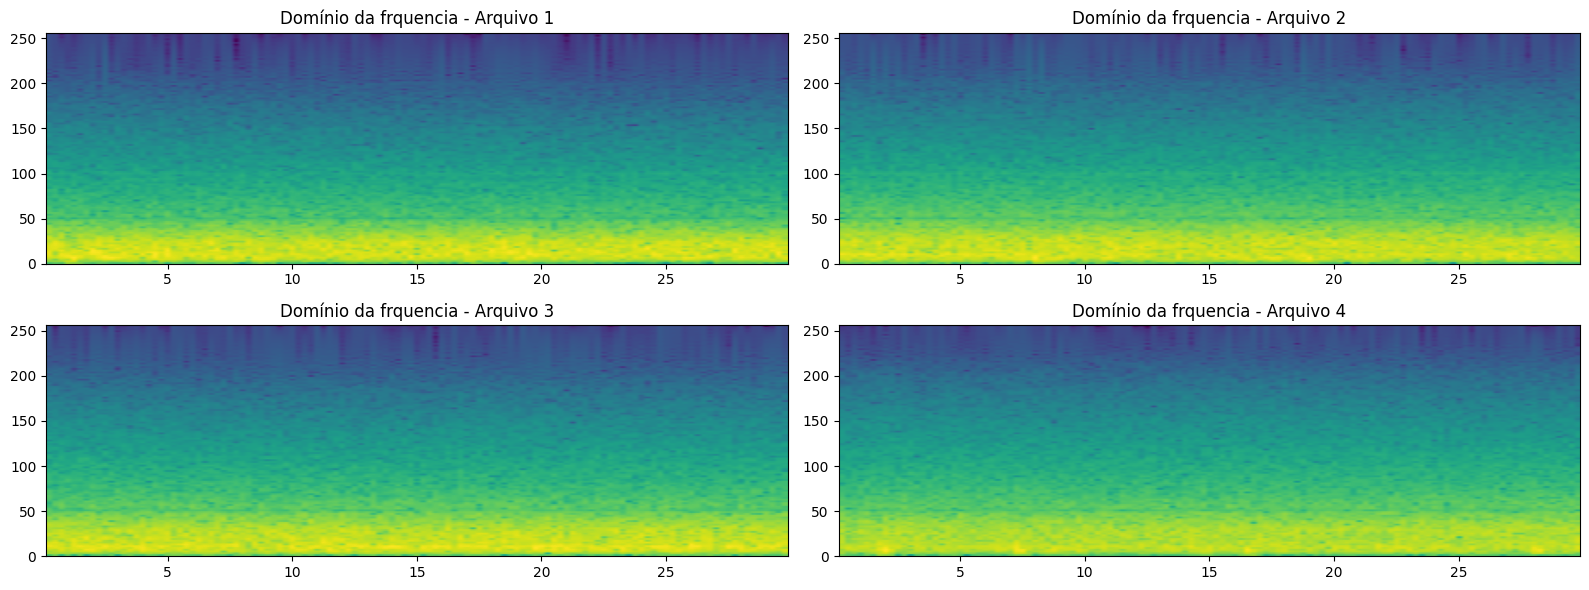

In [4]:
print_graphs(data)

In [5]:
# criação de um objeto "info"
n_channels = 1
sfreq = 512
ch_names = ['Oz']
ch_types = ['eeg']
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: Oz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>

In [6]:
from sklearn.preprocessing import LabelEncoder

# Carregar os 4 arquivos de labels em uma lista
labels_list = []
for i in range(1, 5):
    filename = f"../dataset/single/labels_sub{i}.npy"
    labels = np.load(filename)
    labels_list.append(labels)

# Empilhar os arrays de labels em um único array
labels = np.concatenate(labels_list)

labels.shape

(4, 21)

In [7]:
data_correct_list = []
for i in range(0, 4):
    data_correct_list.append(data[i].reshape(data[i].shape[0], 1, data[i].shape[1]))

data_correct = np.stack(data_correct_list, axis=0)
data_correct.shape

(4, 21, 1, 15360)

In [9]:
# método para transformar labels categóricos
le = LabelEncoder()
mne_data = []
for i in range(0, 4):
    events = np.column_stack((
        np.array(range(len(labels[i]))),
        np.zeros(21, dtype=int),
        le.fit_transform(labels[i]))
    )
    event_dict = {'6':0, '6.5':1, '7':2, '7.5':3, '8.2':4, '9.3':5, '10':6}
    mne_data.append(mne.EpochsArray(data_correct[i], info, events, event_id=event_dict))

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


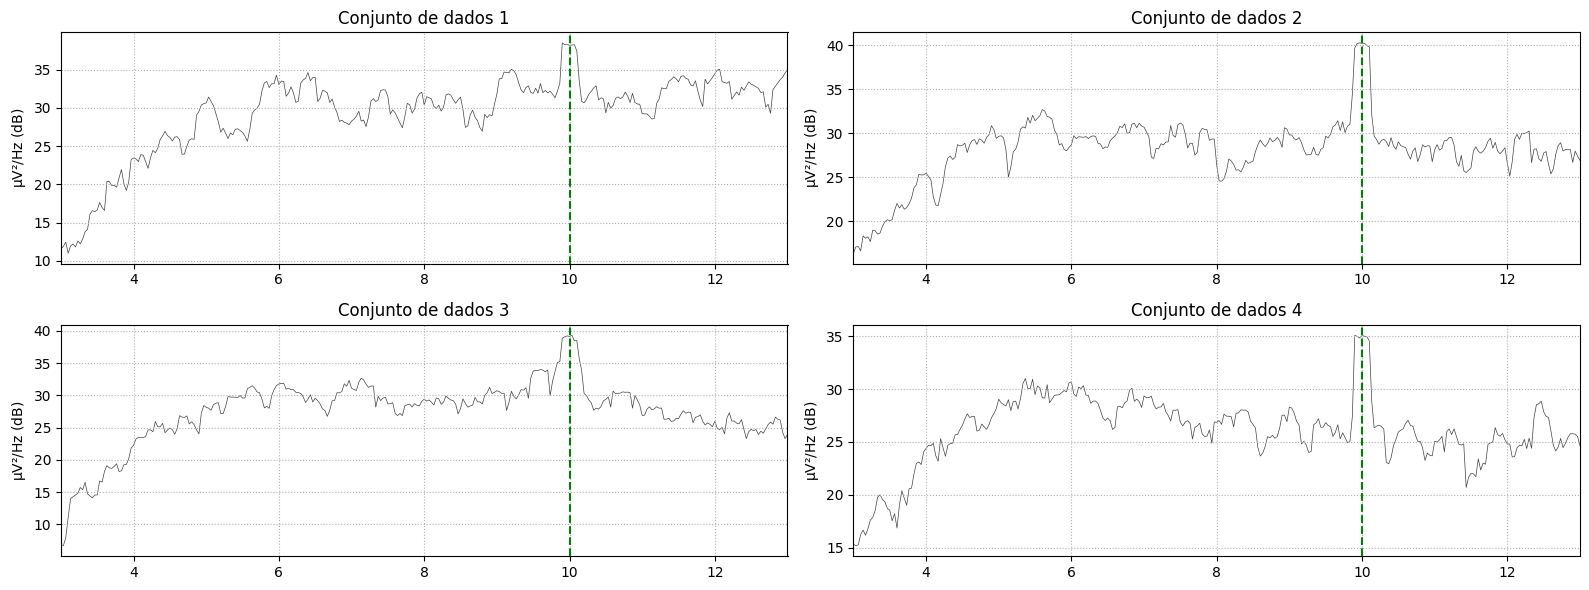

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


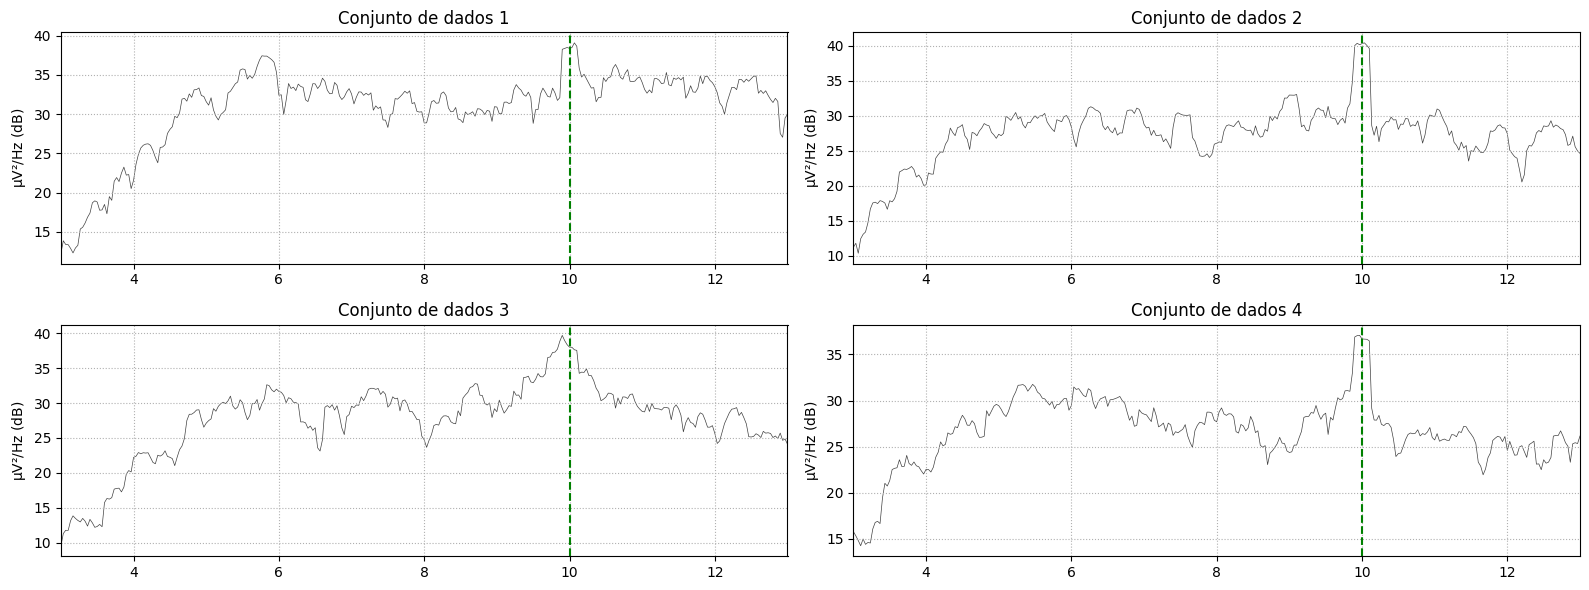

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


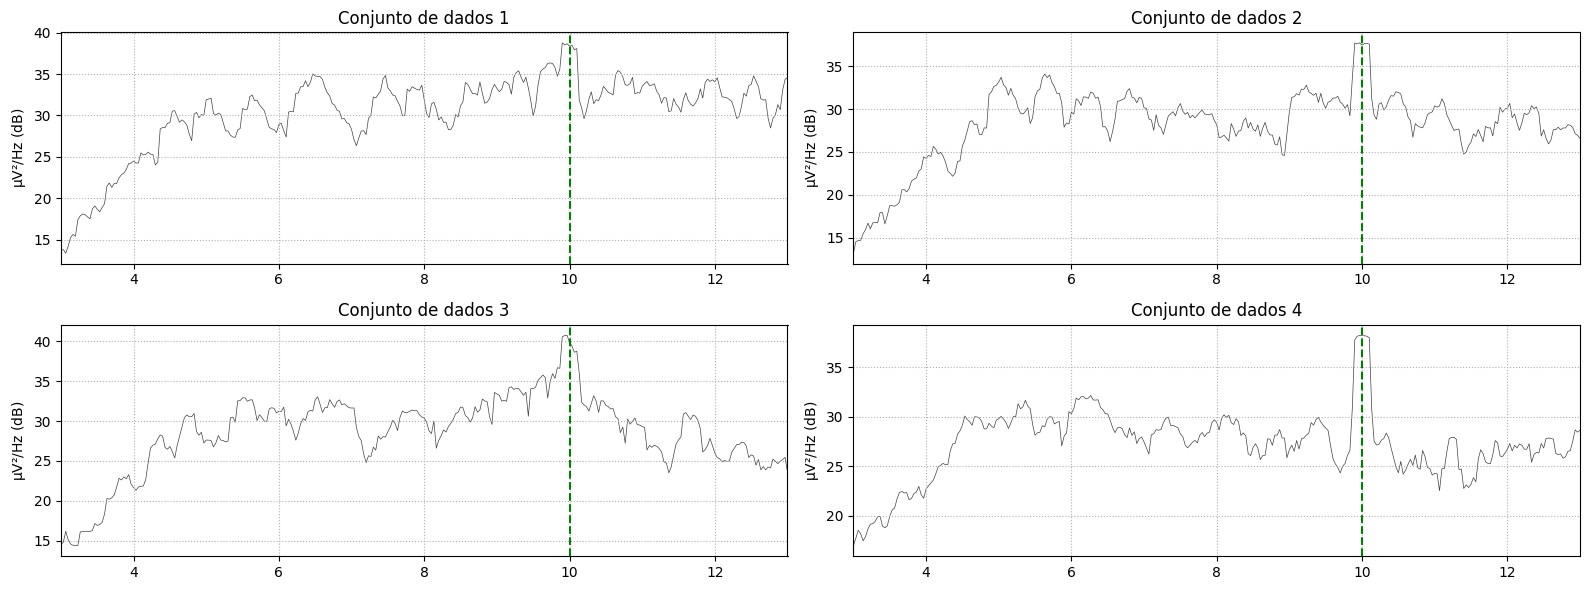

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


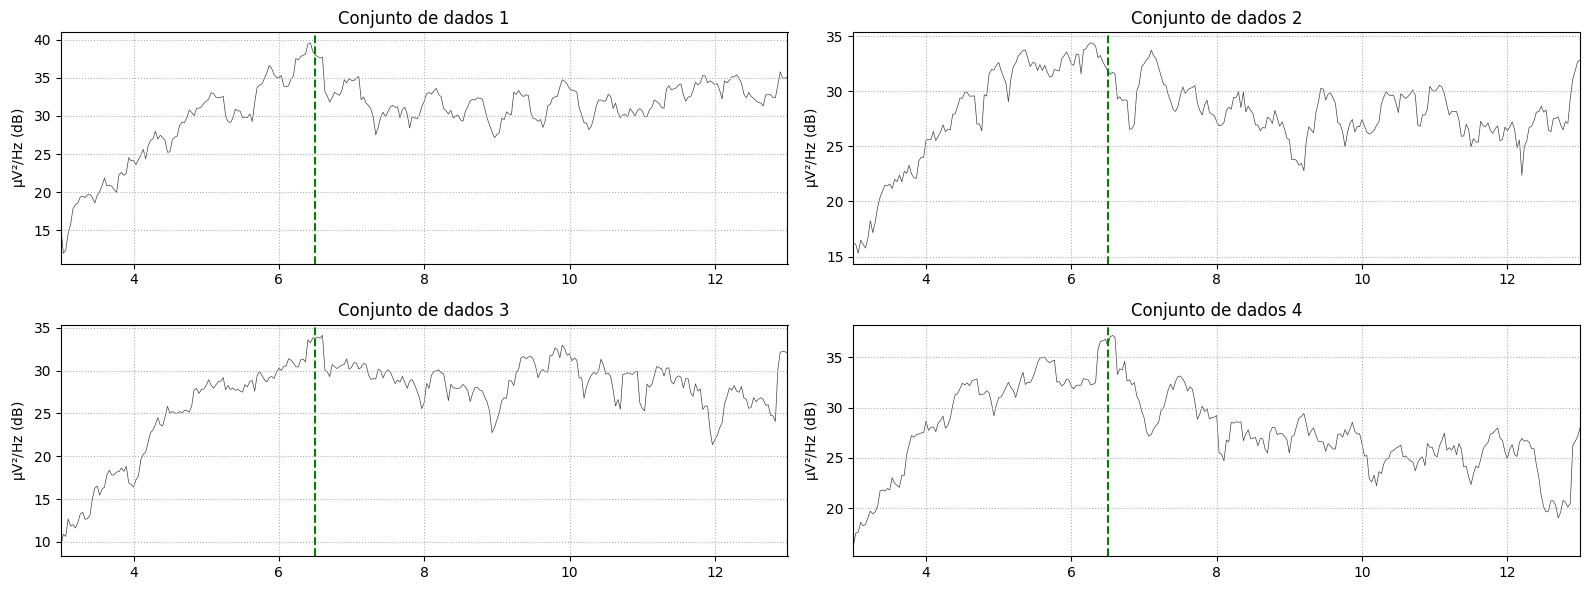

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


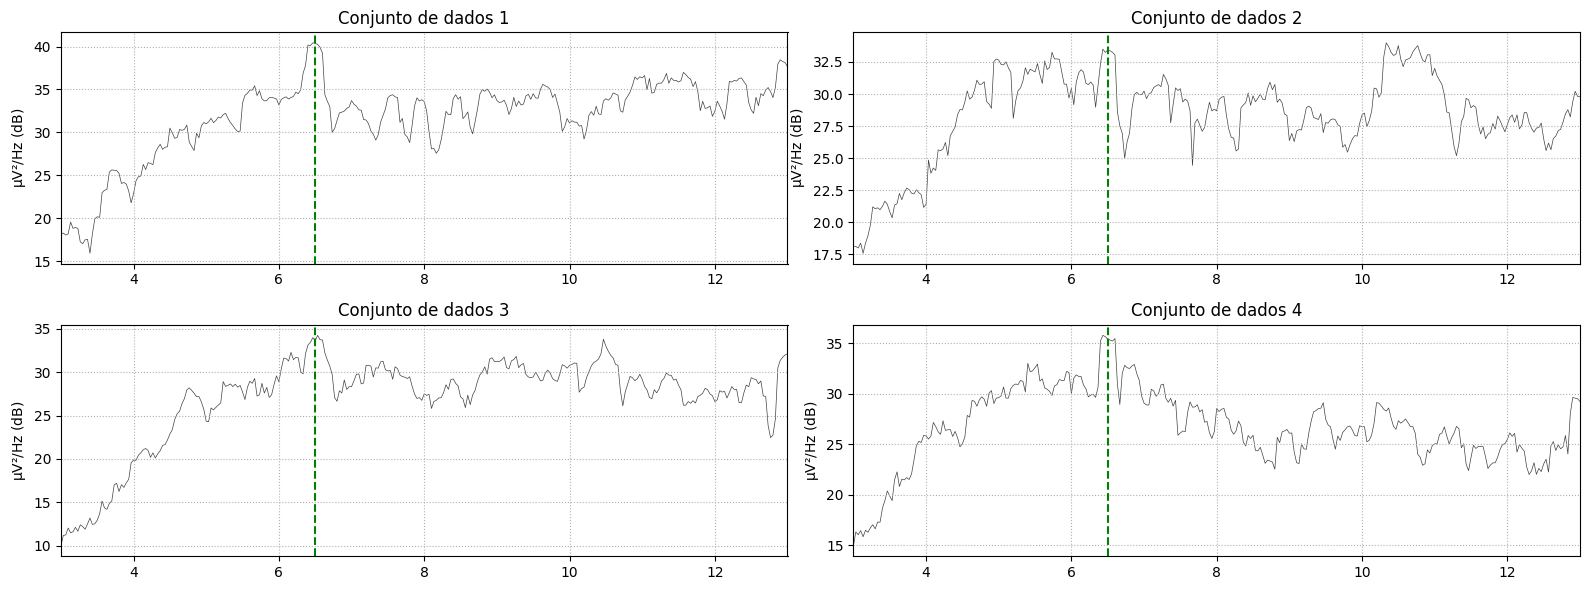

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


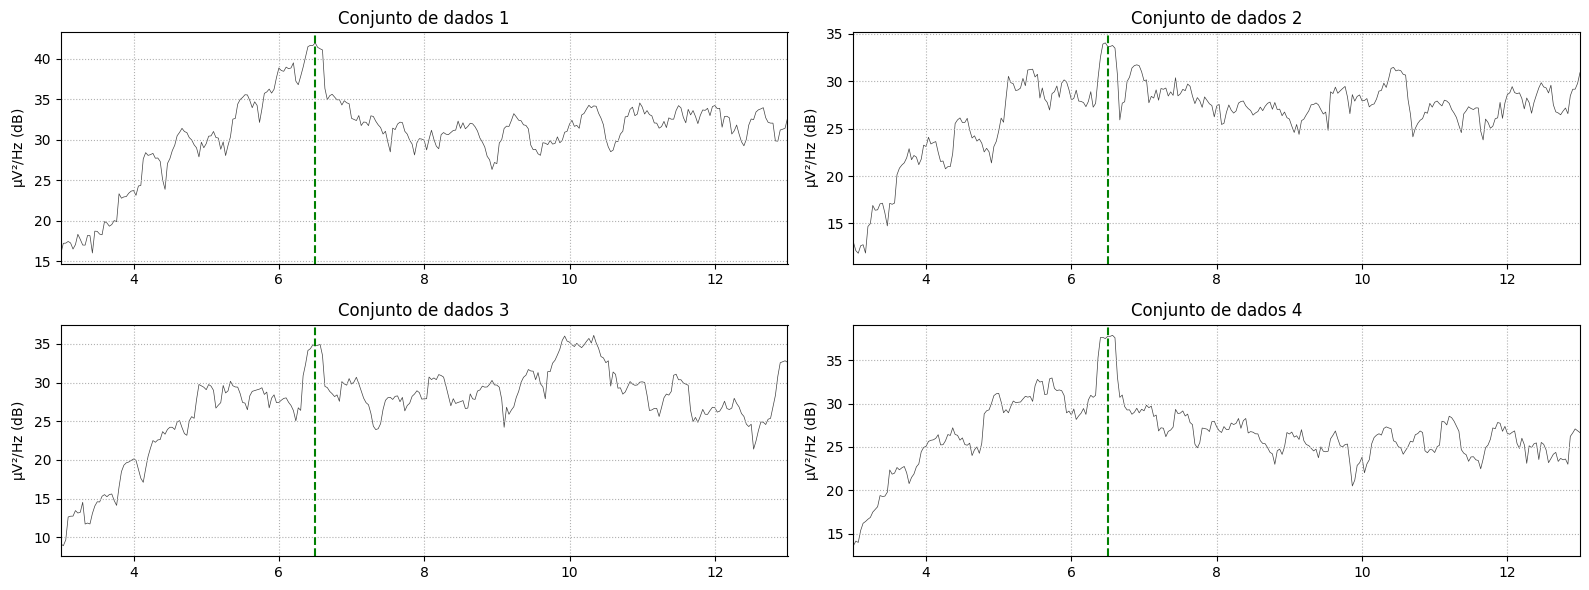

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


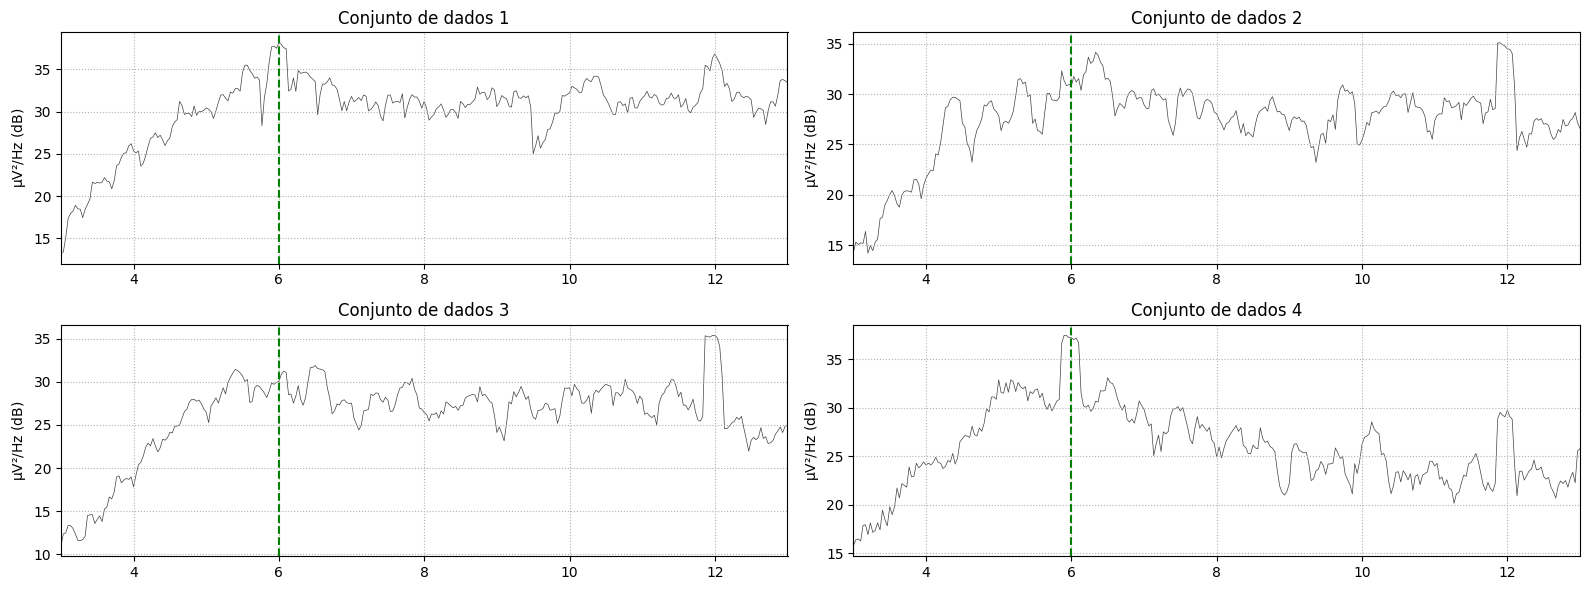

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


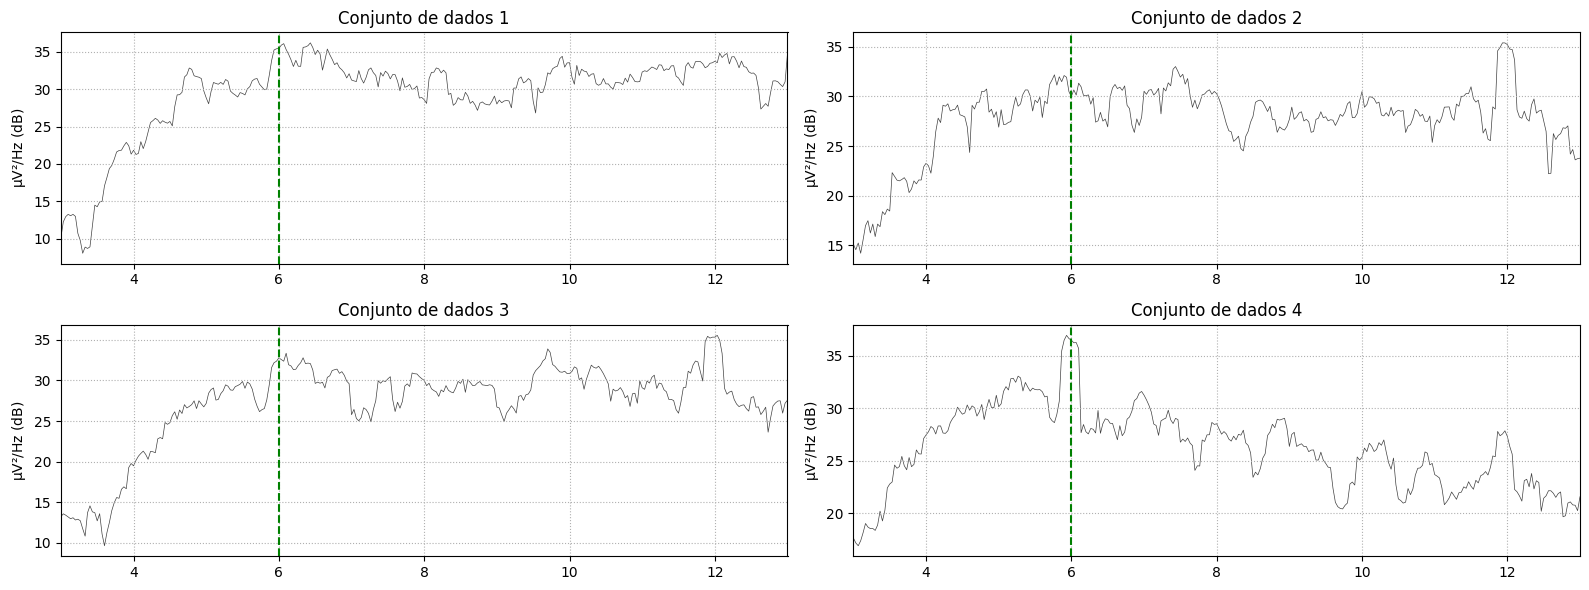

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


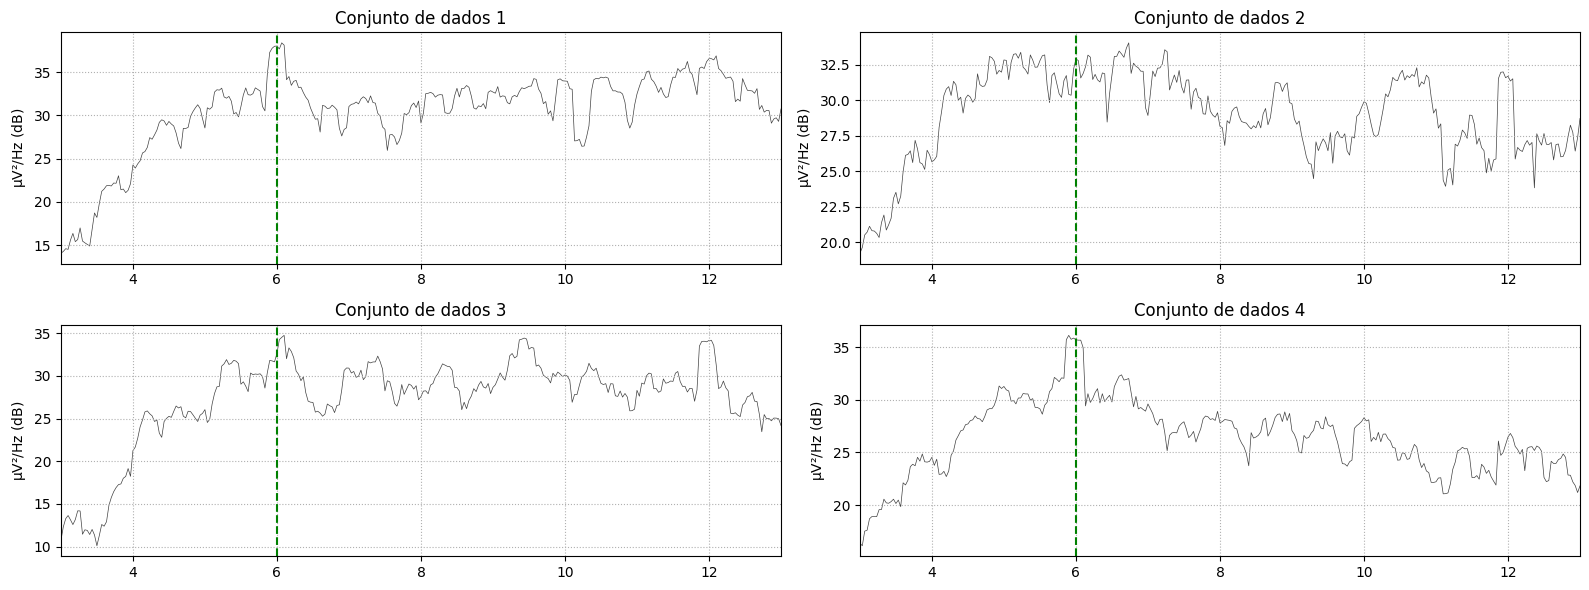

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


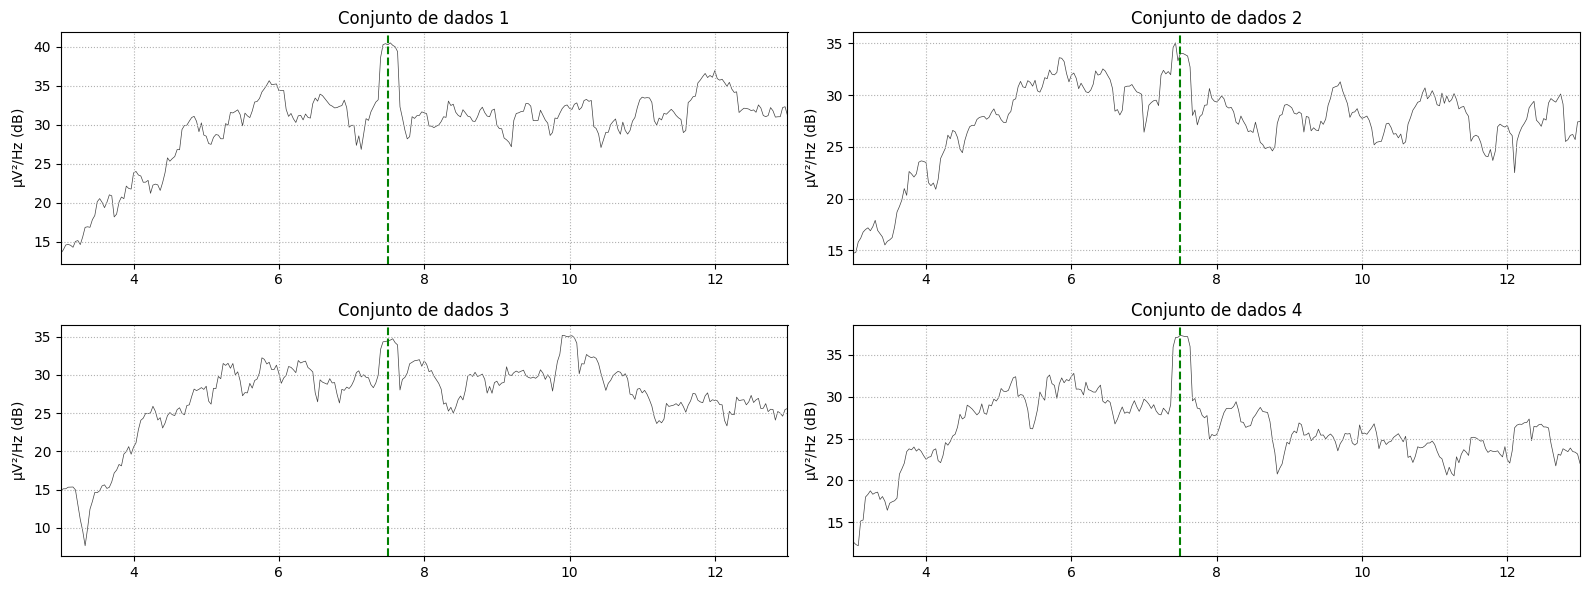

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


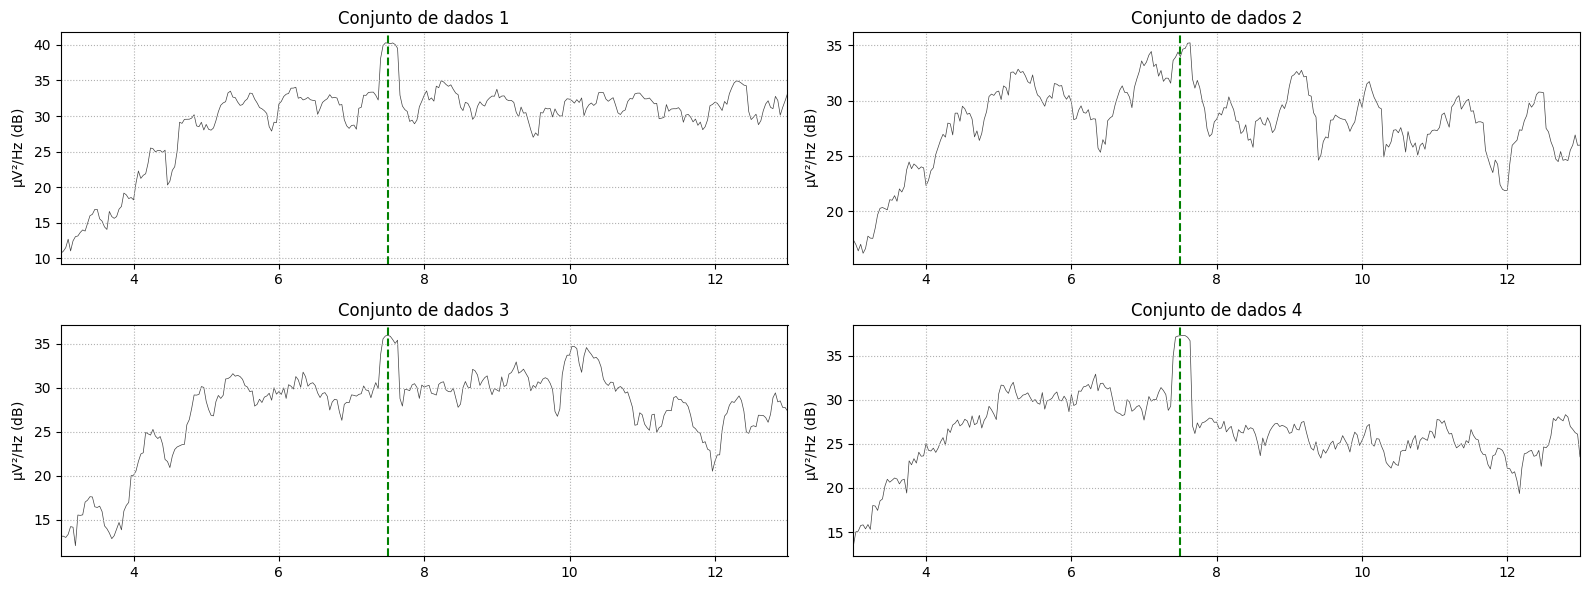

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


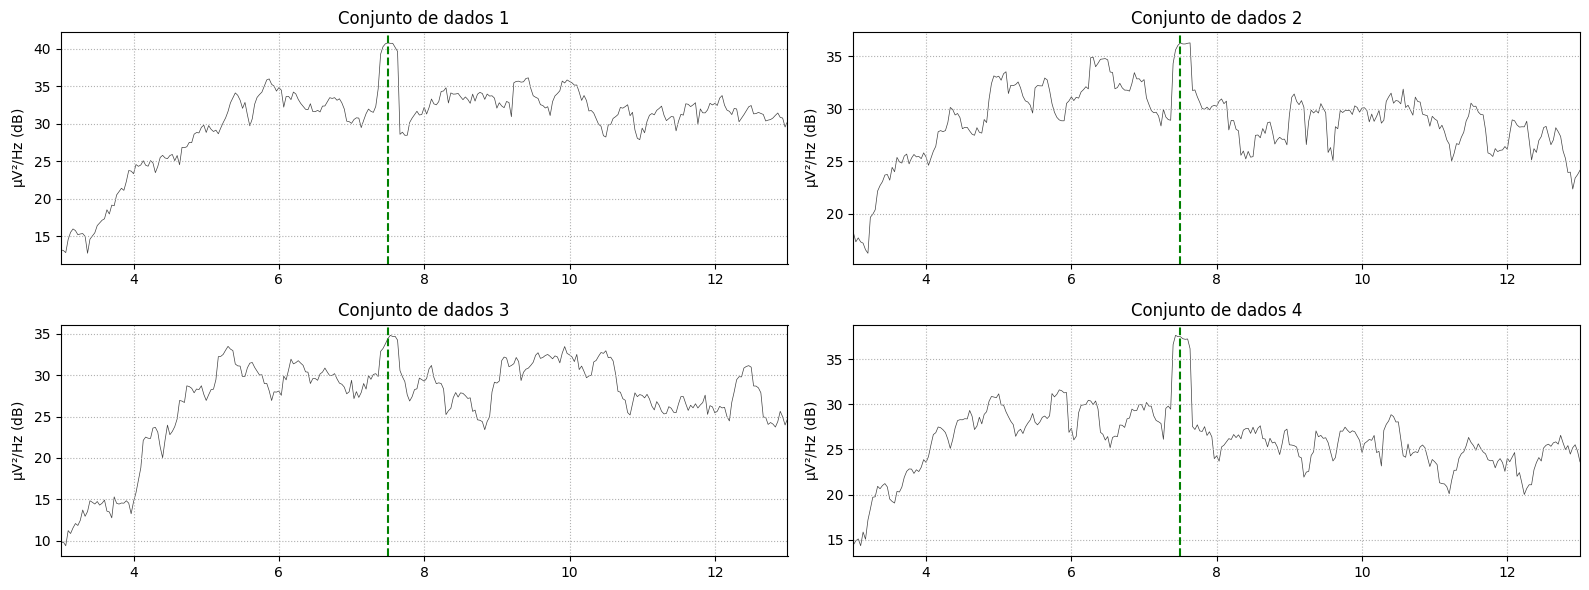

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


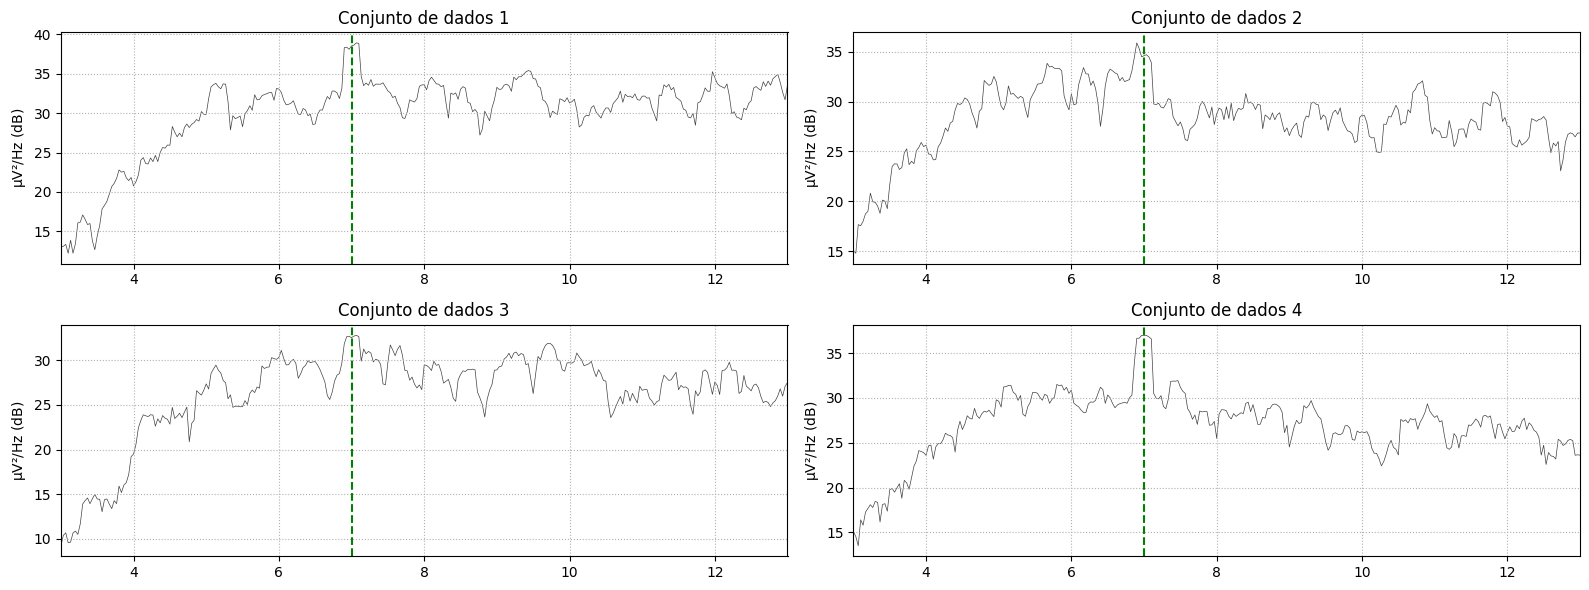

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


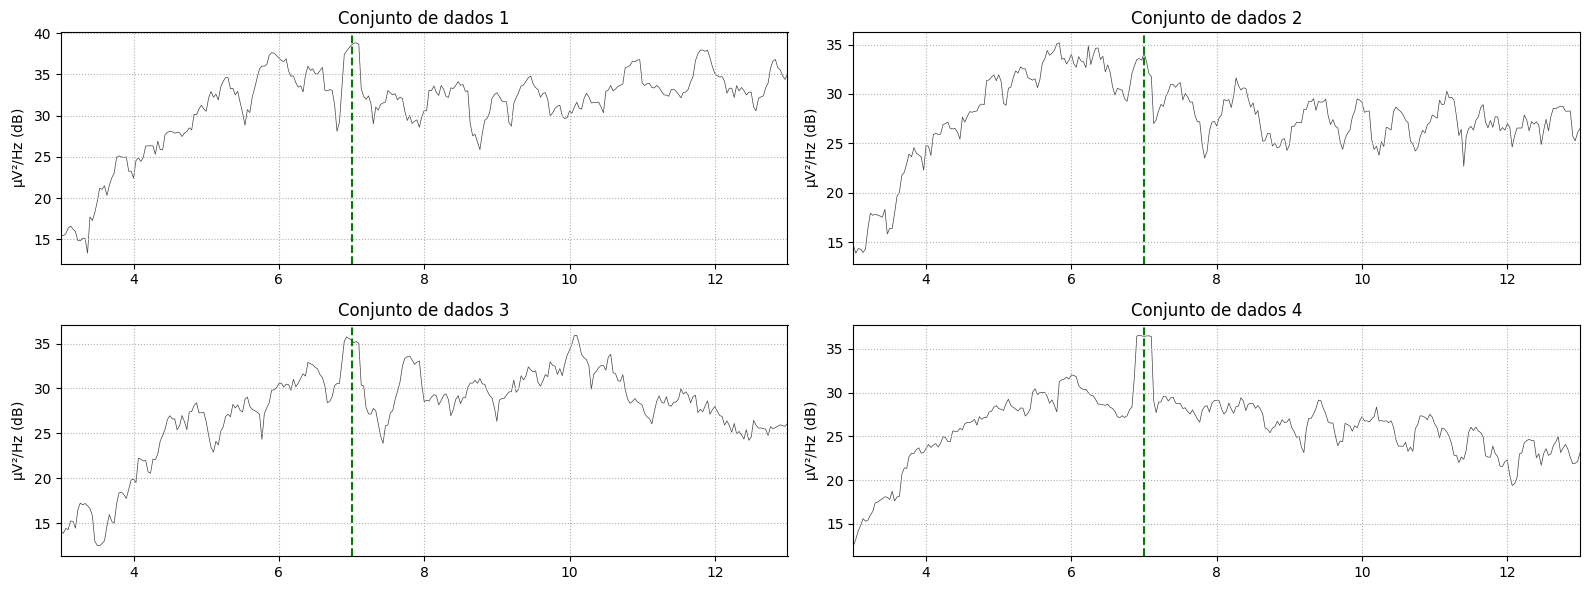

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


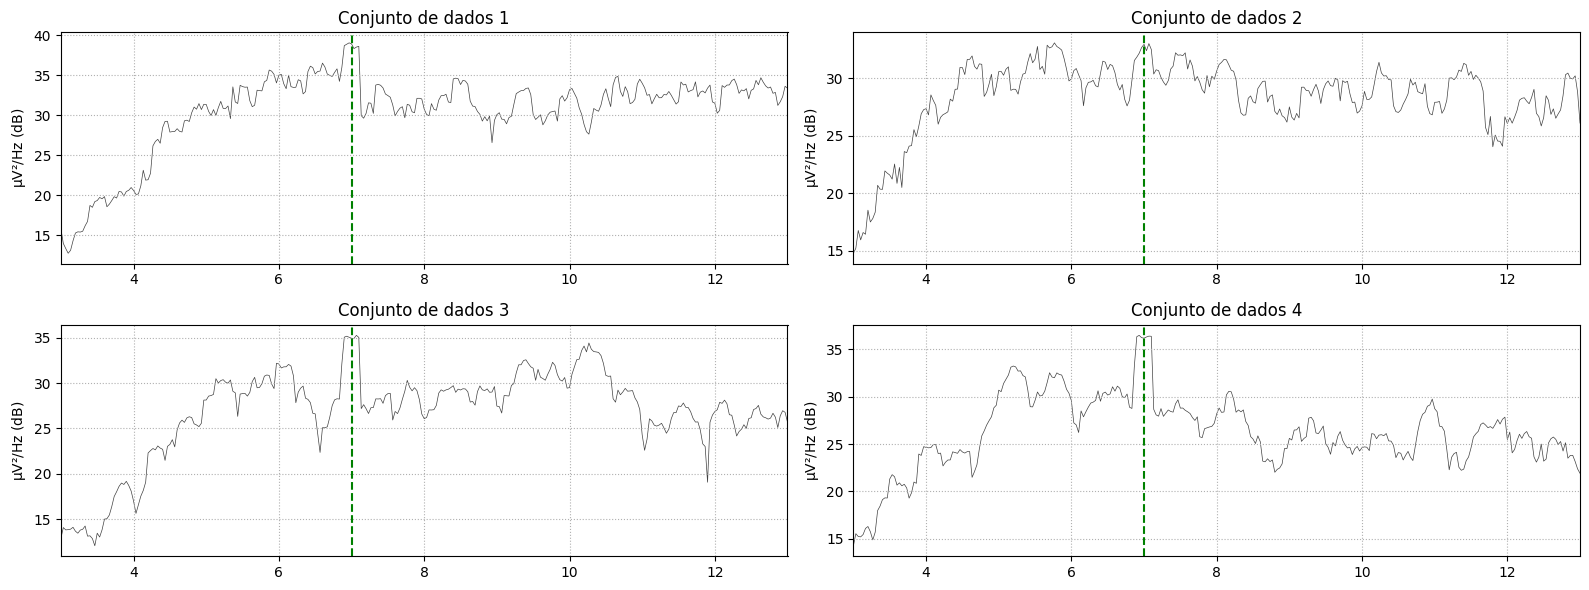

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


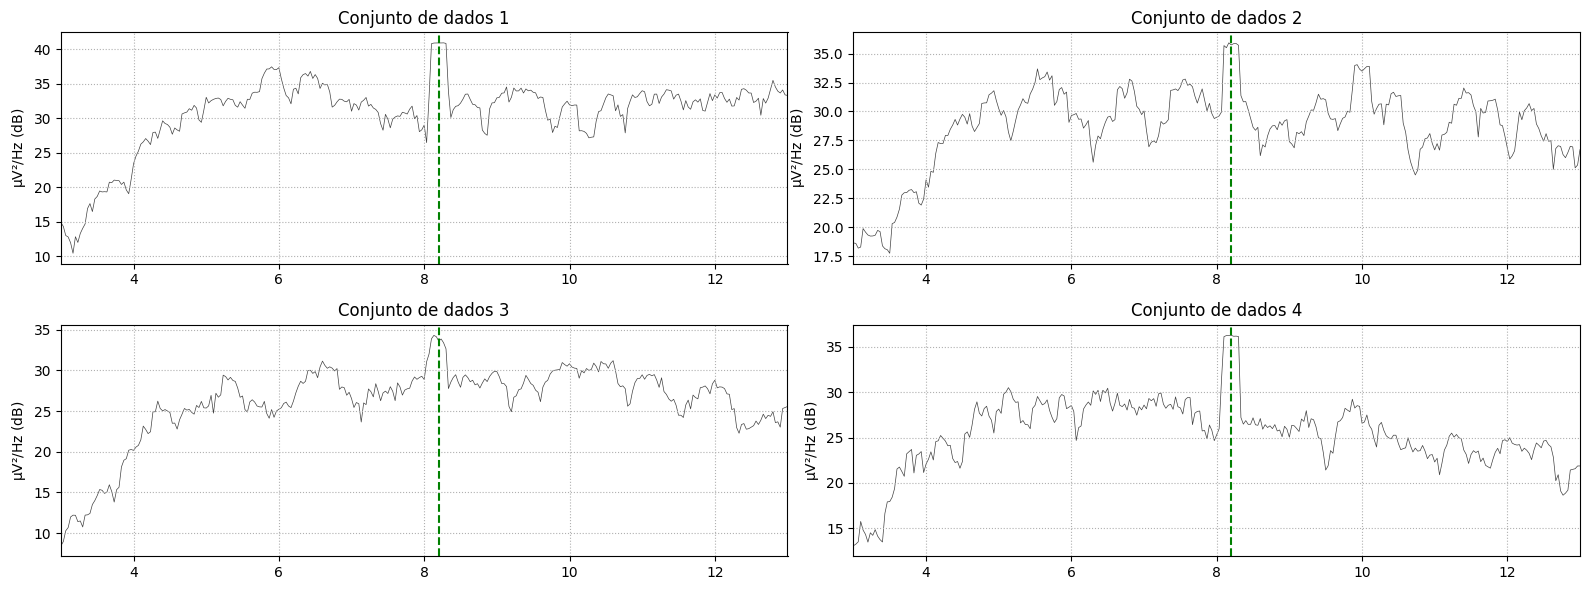

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


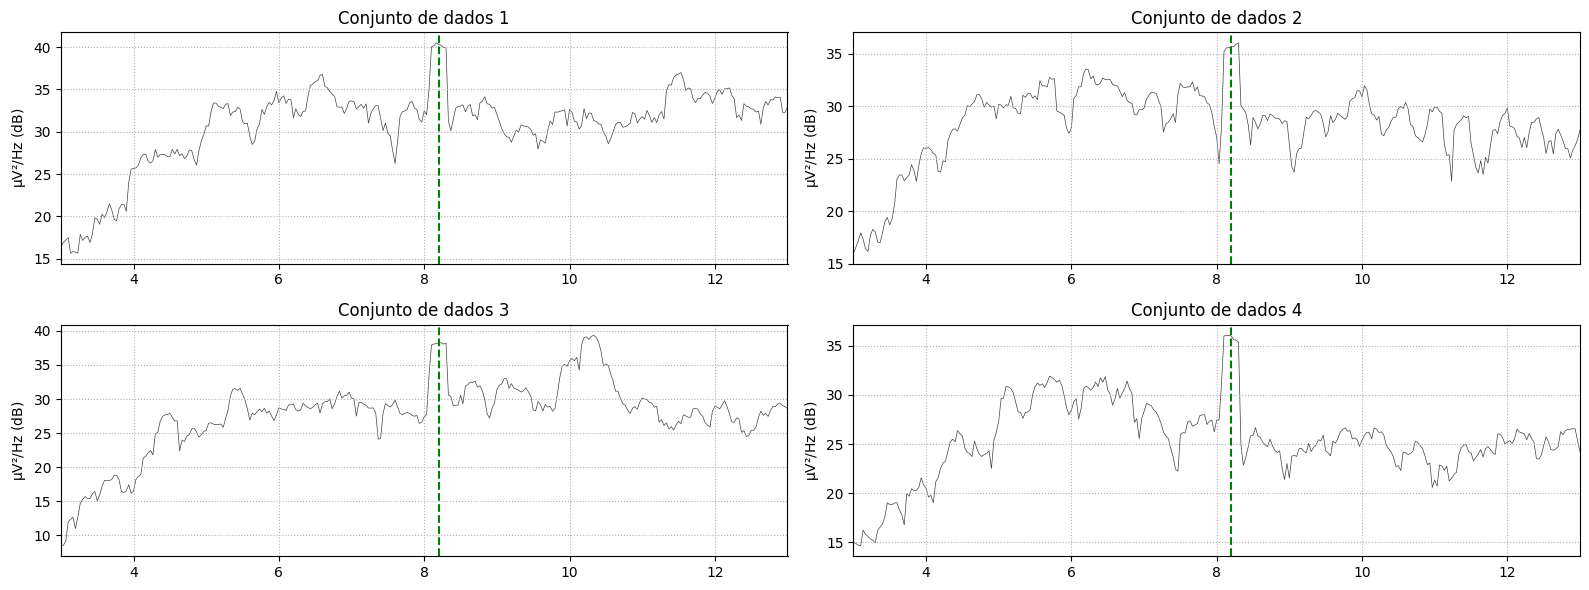

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


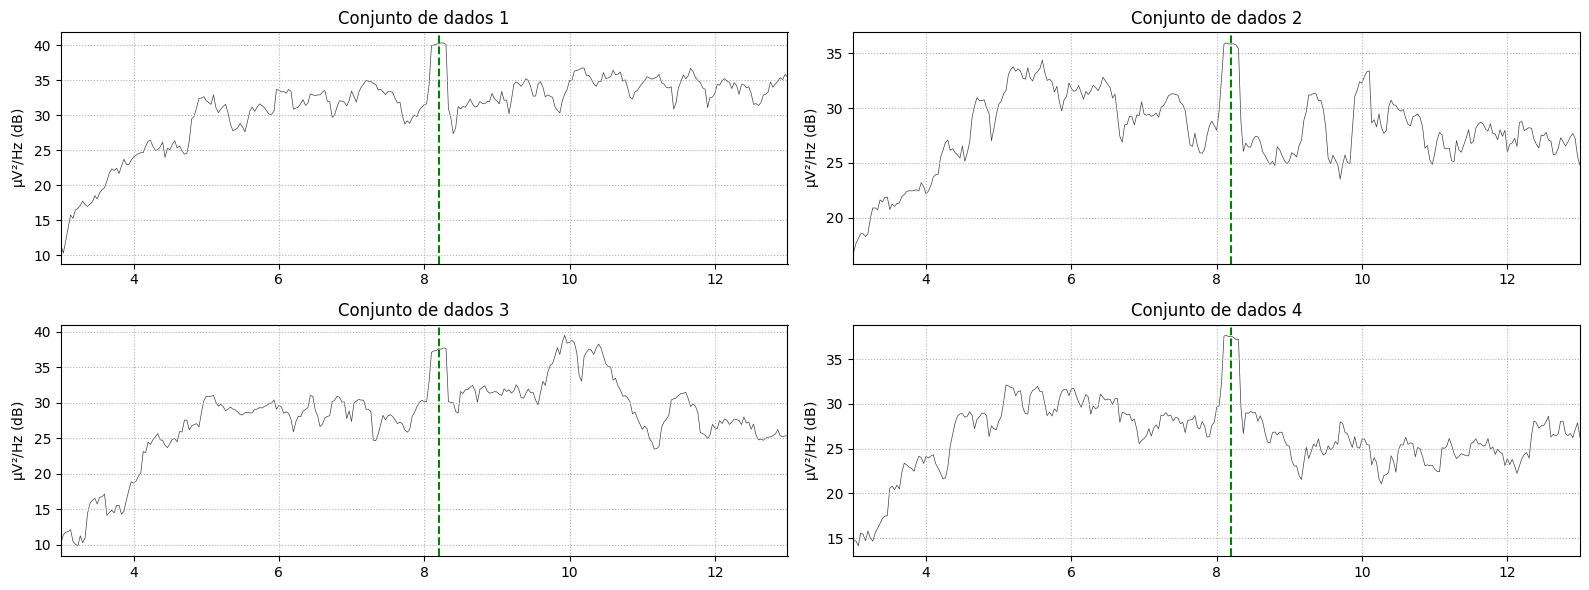

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


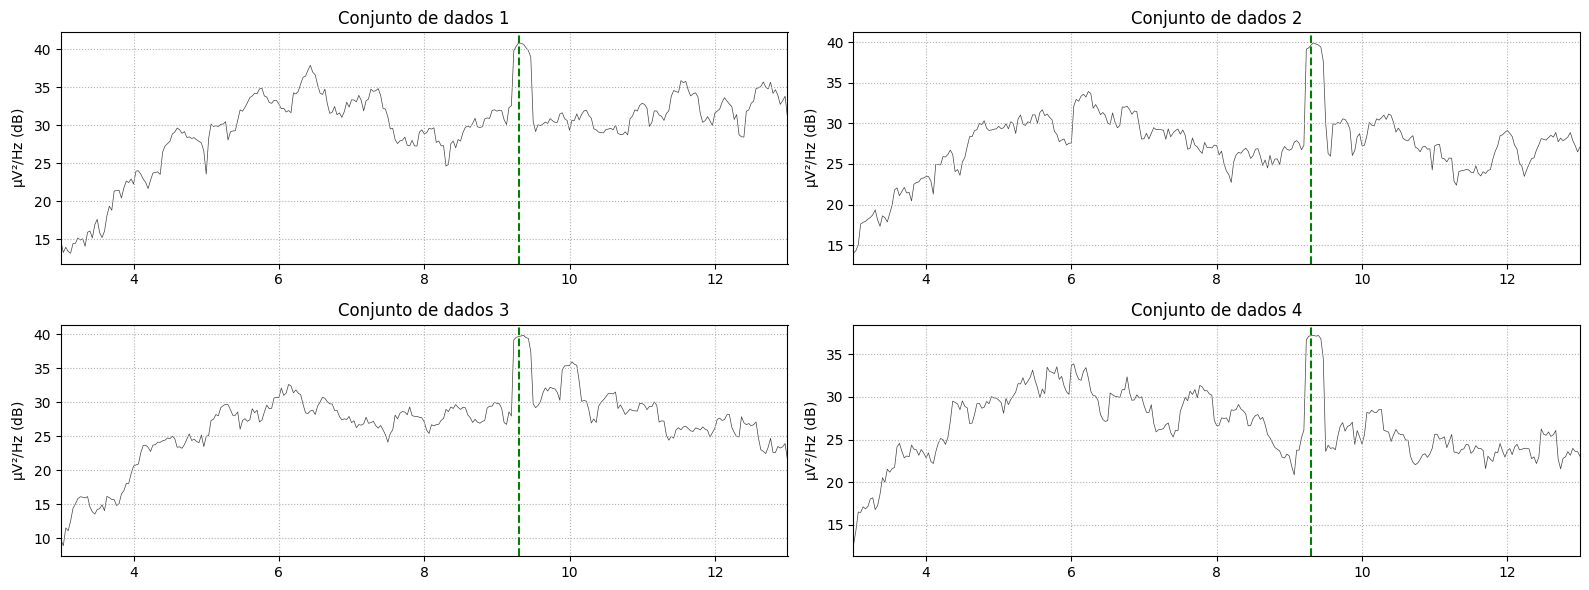

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


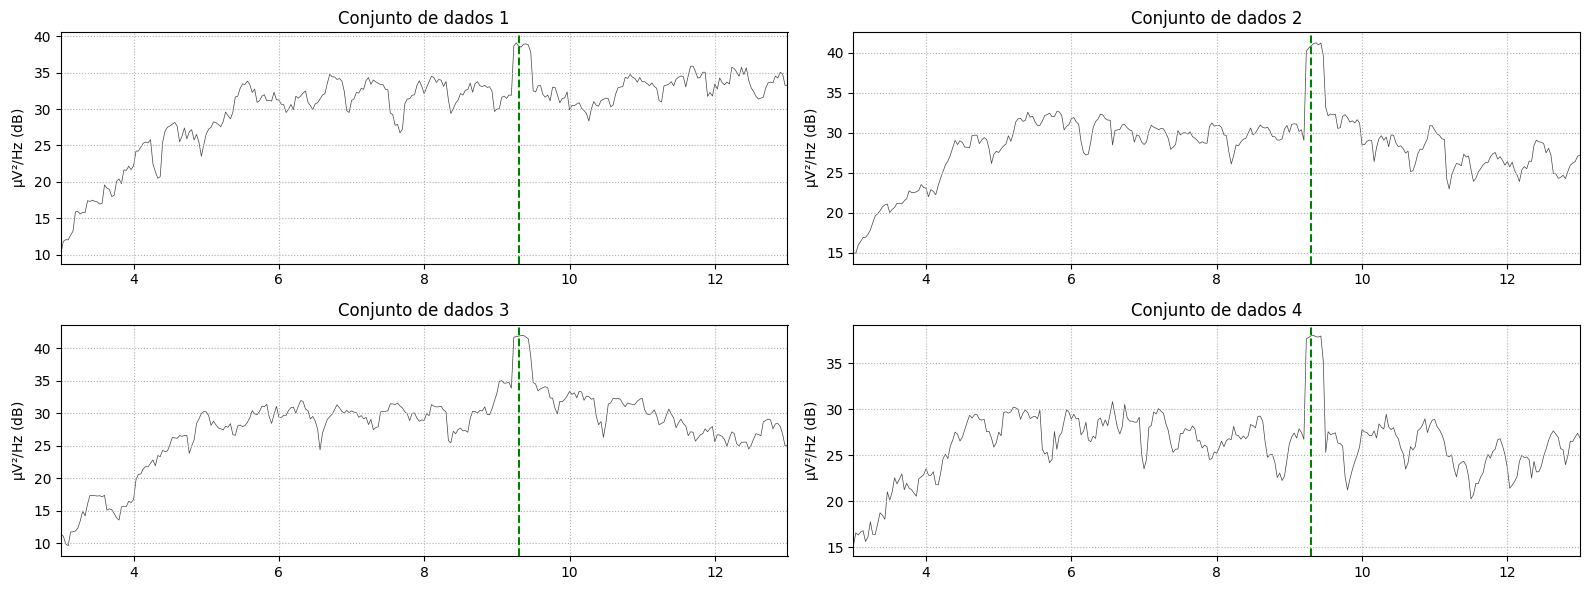

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


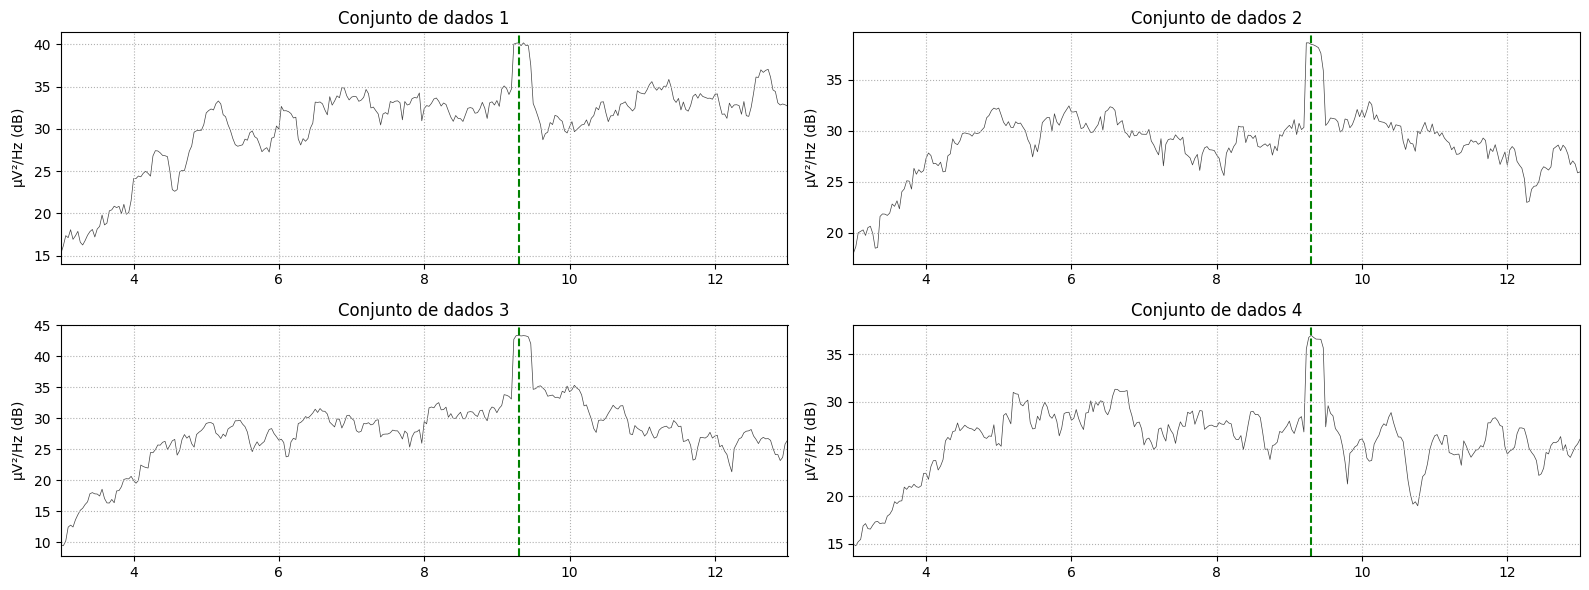

In [10]:
import warnings
warnings.filterwarnings('ignore')

num_plots_per_row = 2

for i in range(len(mne_data[0])):  # Supomos que todos os conjuntos de dados têm o mesmo número de elementos
    # Crie uma nova figura para cada conjunto de dados
    fig, axs = plt.subplots(2, num_plots_per_row, figsize=(16, 6))
    
    for j in range(2):
        view = mne_data[j*2][i].compute_psd(method='multitaper', fmin=3, fmax=13,
                                            verbose=False)
        view.plot(axes=axs[j, 0], show=False)
        axs[j, 0].set_title(f'Conjunto de dados {j*2+1}')
        axs[j, 0].axvline(x=float(list(mne_data[j*2][i].event_id)[0]), linestyle='--',
                          color='green')
        
        view = mne_data[j*2+1][i].compute_psd(method='multitaper', fmin=3, fmax=13,
                                              verbose=False)
        view.plot(axes=axs[j, 1], show=False)
        axs[j, 1].set_title(f'Conjunto de dados {j*2+2}')
        axs[j, 1].axvline(x=float(list(mne_data[j*2+1][i].event_id)[0]), linestyle='--',
                          color='green')
    
    plt.tight_layout()
    plt.show()
